Exploring the MovieLens 1M Dataset

This dataset contains 1 million ratings collected from 6,000 users on 4,000 movies, and it is organized into three tables:

- Ratings
- Users
- Movie information
Each table is available as a separate file, each containing a series of rows where columns are separated by two colons (::).

Code

In [21]:
import pandas as pd

In [22]:
# import dataset
data = pd.read_csv('movie_lens_genre_separated.tsv', sep='\t')

In [23]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Animation
1,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Children's
2,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Comedy
3,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Animation
4,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Children's


In [24]:
# mean movie ratings for each film grouped by gender,
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [25]:
# Find the titles of movies that were rated more than 250 times

ratings_by_title = data.groupby('title').size()
active_titles = ratings_by_title.index[ratings_by_title >= 250]
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


In [26]:
# To see the top films among female viewers, sort by the F column in descending order:

top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Grand Illusion (Grande illusion, La) (1937)",4.560976,4.266129
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611


In [27]:
# To see the top films among male viewers, sort by the M column in descending order:

top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
Paths of Glory (1957),4.392857,4.485149
"Wrong Trousers, The (1993)",4.588235,4.478261


In [28]:
#find the movies that are most divisive between male and female viewers
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

#Sorting by 'diff' gives the movies with the greatest rating difference and which were preferred by women
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Cutthroat Island (1995),3.200000,2.341270,-0.858730
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Home Alone 3 (1997),2.486486,1.683761,-0.802726
That Darn Cat! (1997),3.156250,2.435484,-0.720766
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Dracula: Dead and Loving It (1995),2.892857,2.250000,-0.642857
"Pagemaster, The (1994)",3.146341,2.510638,-0.635703
Grease (1978),3.975265,3.367041,-0.608224
Herbie Goes Bananas (1980),2.965517,2.373333,-0.592184


In [29]:
# top 10 movies preferred by men that women didn’t rate highly
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
Lifeforce (1985),2.250000,2.994152,0.744152
Marked for Death (1990),2.100000,2.837607,0.737607
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
No Escape (1994),2.300000,2.994048,0.694048
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985


Occupations and Age Groups

In [30]:
occupation_dict = { 
    0: "not specified", 
    1: "academic/educator",
    2:  "artist",
    3:  "clerical/admin",
    4:  "college/grad student",
    5:  "customer service",
    6:  "doctor/health care",
    7:  "executive/managerial",
    8:  "farmer",
    9:  "homemaker",
    10:  "K-12 student",
    11:  "lawyer",
    12:  "programmer",
    13:  "retired",
    14:  "sales/marketing",
    15:  "scientist",
    16:  "self-employed",
    17:  "technician/engineer",
    18:  "tradesman/craftsman",
    19:  "unemployed",
    20:  "writer"
}

age_dict = {
    1:  "Under 18",
    18:  "18-24",
    25:  "25-34",
    35:  "35-44",
    45:  "45-49",
    50:  "50-55",
    56:  "56+"
}

In [31]:
data['age'] = [age_dict[x] for x in data['age']]
data['occupation'] = [occupation_dict[x] for x in data['occupation']]
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Animation
1,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Children's
2,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Comedy
3,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Animation
4,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Children's


# 1: An aggregate (average) of the movie ratings for each particular genre

In [32]:
genre_avg_ratings = pd.pivot_table(data,values='rating',index='genres',aggfunc='mean').reset_index().rename(columns={'rating': 'avg_rating'})

genre_avg_ratings.sort_values('avg_rating', ascending=False)

,genres,avg_rating
9,Film-Noir,4.075188
6,Documentary,3.933123
16,War,3.893327
7,Drama,3.766332
5,Crime,3.708679
2,Animation,3.684895
12,Mystery,3.668102
11,Musical,3.665519
17,Western,3.637770
13,Romance,3.607465


# 2: The top 5 highest ranked genre by occupation

In [33]:
# mean for each genre occupation 
genre_occu = pd.pivot_table(data, values = 'rating', index= ['genres', 'occupation'], aggfunc='mean').reset_index()

# sort 
sorted_data = genre_occu.sort_values(['occupation', 'rating'], ascending=[True, False])

# top 5 genres for each occupation
top5_genre_occu = sorted_data.groupby('occupation').head(5).reset_index()

top5_genre_occu.head(25)

,index,genres,occupation,rating
0,189,Film-Noir,K-12 student,4.212766
1,336,War,K-12 student,3.880144
2,147,Drama,K-12 student,3.782167
3,105,Crime,K-12 student,3.687085
4,252,Mystery,K-12 student,3.636612
5,190,Film-Noir,academic/educator,4.082613
6,127,Documentary,academic/educator,3.984887
7,337,War,academic/educator,3.882950
8,148,Drama,academic/educator,3.754293
9,232,Musical,academic/educator,3.701586


# 3: The most popular (with most ratings) movie by age group

In [34]:
# Rating count for each movie by age group
movie_age_group = data.groupby(['age',  'title']).size().reset_index(name= 'rating_count')

# sort by age and rating counts, then take 1 movie title from each age group
most_ratings_age_group = movie_age_group.sort_values(['age', 'rating_count'], ascending = [True, False]).groupby('age').head(1).reset_index(drop = True)

most_ratings_age_group

,age,title,rating_count
0,18-24,Star Wars: Episode VI - Return of the Jedi (1983),2930
1,25-34,Star Wars: Episode V - The Empire Strikes Back...,5880
2,35-44,Star Wars: Episode V - The Empire Strikes Back...,2990
3,45-49,Star Wars: Episode V - The Empire Strikes Back...,1130
4,50-55,Star Wars: Episode V - The Empire Strikes Back...,1030
5,56+,Star Wars: Episode V - The Empire Strikes Back...,565
6,Under 18,Star Wars: Episode VI - Return of the Jedi (1983),500


# 4: A breakdown of a movie’s ratings by occupation, Star Wars: Episode V

In [35]:
# filter data by movie title 
movie_data = data[data['title'].str.contains('Star Wars: Episode V', case=False, na=False)]

# group by occupation and rating to get movie mean rating
movie_rate_data = movie_data.groupby('occupation')['rating'].mean().reset_index().sort_values('rating', ascending = False).reset_index(drop=True)

movie_rate_data

,occupation,rating
0,tradesman/craftsman,4.333333
1,programmer,4.300221
2,customer service,4.271930
3,technician/engineer,4.271698
4,doctor/health care,4.250000
5,college/grad student,4.236779
6,sales/marketing,4.224561
7,scientist,4.220126
8,clerical/admin,4.156463
9,not specified,4.154206


# 5: A function that given a user id, returns: (1) this user’s age and occupation, (2)
the average rating given by this user, and (3) his highest and lowest rated movie(s)

In [36]:
def user_profile(df, userid):
    # filter by user id 
    userdata = df[df['user_id'] == userid]
    # get user age and occupation
    age = userdata['age'].iloc[0]
    occupation = userdata['occupation'].iloc[0]
    # average rating
    avg_rating = userdata['rating'].mean()
    # highest and lowest rated movie
    highest_rating = userdata['rating'].max()
    lowest_rating = userdata['rating'].min()
    high_movies = userdata[userdata['rating'] == highest_rating]['title'].unique()
    low_movies = userdata[userdata['rating'] == lowest_rating]['title'].unique()
    return {
        "age": age,
        "occupation": occupation,
        "average_rating": avg_rating,
        "highest_rating": highest_rating,
        "lowest_rating": lowest_rating,
        "highest_rated_movies": high_movies,
        "lowest_rated_movies": low_movies,
    }
print(user_profile(data, 2355))

{'age': '45-49', 'occupation': 'homemaker', 'average_rating': np.float64(3.572992700729927), 'highest_rating': 5, 'lowest_rating': 1, 'highest_rated_movies': array(['Sound of Music, The (1965)', 'Run Lola Run (Lola rennt) (1998)',
       'To Kill a Mockingbird (1962)', 'Shakespeare in Love (1998)',
       'Gone with the Wind (1939)', 'Raising Arizona (1987)',
       'North by Northwest (1959)', 'Much Ado About Nothing (1993)',
       'West Side Story (1961)', 'Casablanca (1942)', 'Chinatown (1974)',
       'Arsenic and Old Lace (1944)', 'Young Frankenstein (1974)',
       'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)',
       'Producers, The (1968)', 'Streetcar Named Desire, A (1951)',
       "Singin' in the Rain (1952)", 'Sting, The (1973)',
       'Charade (1963)', 'Third Man, The (1949)',
       'It Happened One Night (1934)', 'Notorious (1946)',
       'Lady Vanishes, The (1938)', 'To Catch a Thief (1955)',
       'Guys and Dolls (1955)', 'Cat Ballou 

# 6: Interesting observations:

In [37]:
# Group by title and find mean and rating counts
movie_stats = data.groupby('title')['rating'].agg(['mean', 'count'])

# movies with at least 10000 ratings
filtered = movie_stats[movie_stats['count'] >= 10000]

# movie with the highest mean
max_mean = filtered['mean'].max()
best_mean_movies = filtered[filtered['mean'] == max_mean]

# find the title with the highest vote count
max_count = best_mean_movies['count'].max()
best_movies = best_mean_movies[best_mean_movies['count'] == max_count]

print(best_movies)

                                               mean  count
title                                                     
Star Wars: Episode IV - A New Hope (1977)  4.453694  11964


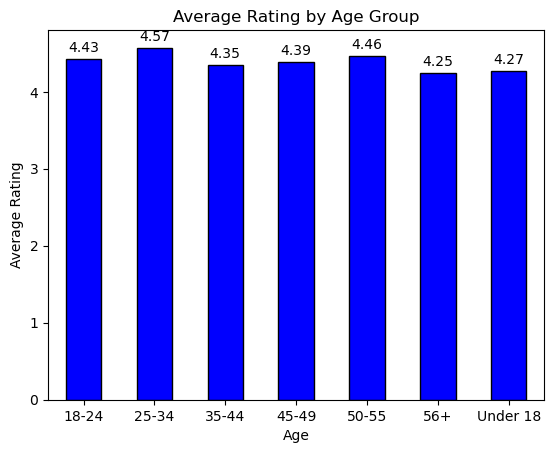

In [38]:
import matplotlib.pyplot as plt

starwars4 = data[data['title'] == 'Star Wars: Episode IV - A New Hope (1977)']
age_group = starwars4.groupby('age')['rating'].mean()

ax = age_group.plot(
    kind='bar',
    color='blue',
    edgecolor='black',
    linewidth=1
)

# exact value labels on the bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type='edge', color='black', fontsize=10, padding=3)

plt.title("Average Rating by Age Group")
plt.xlabel("Age")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.show()

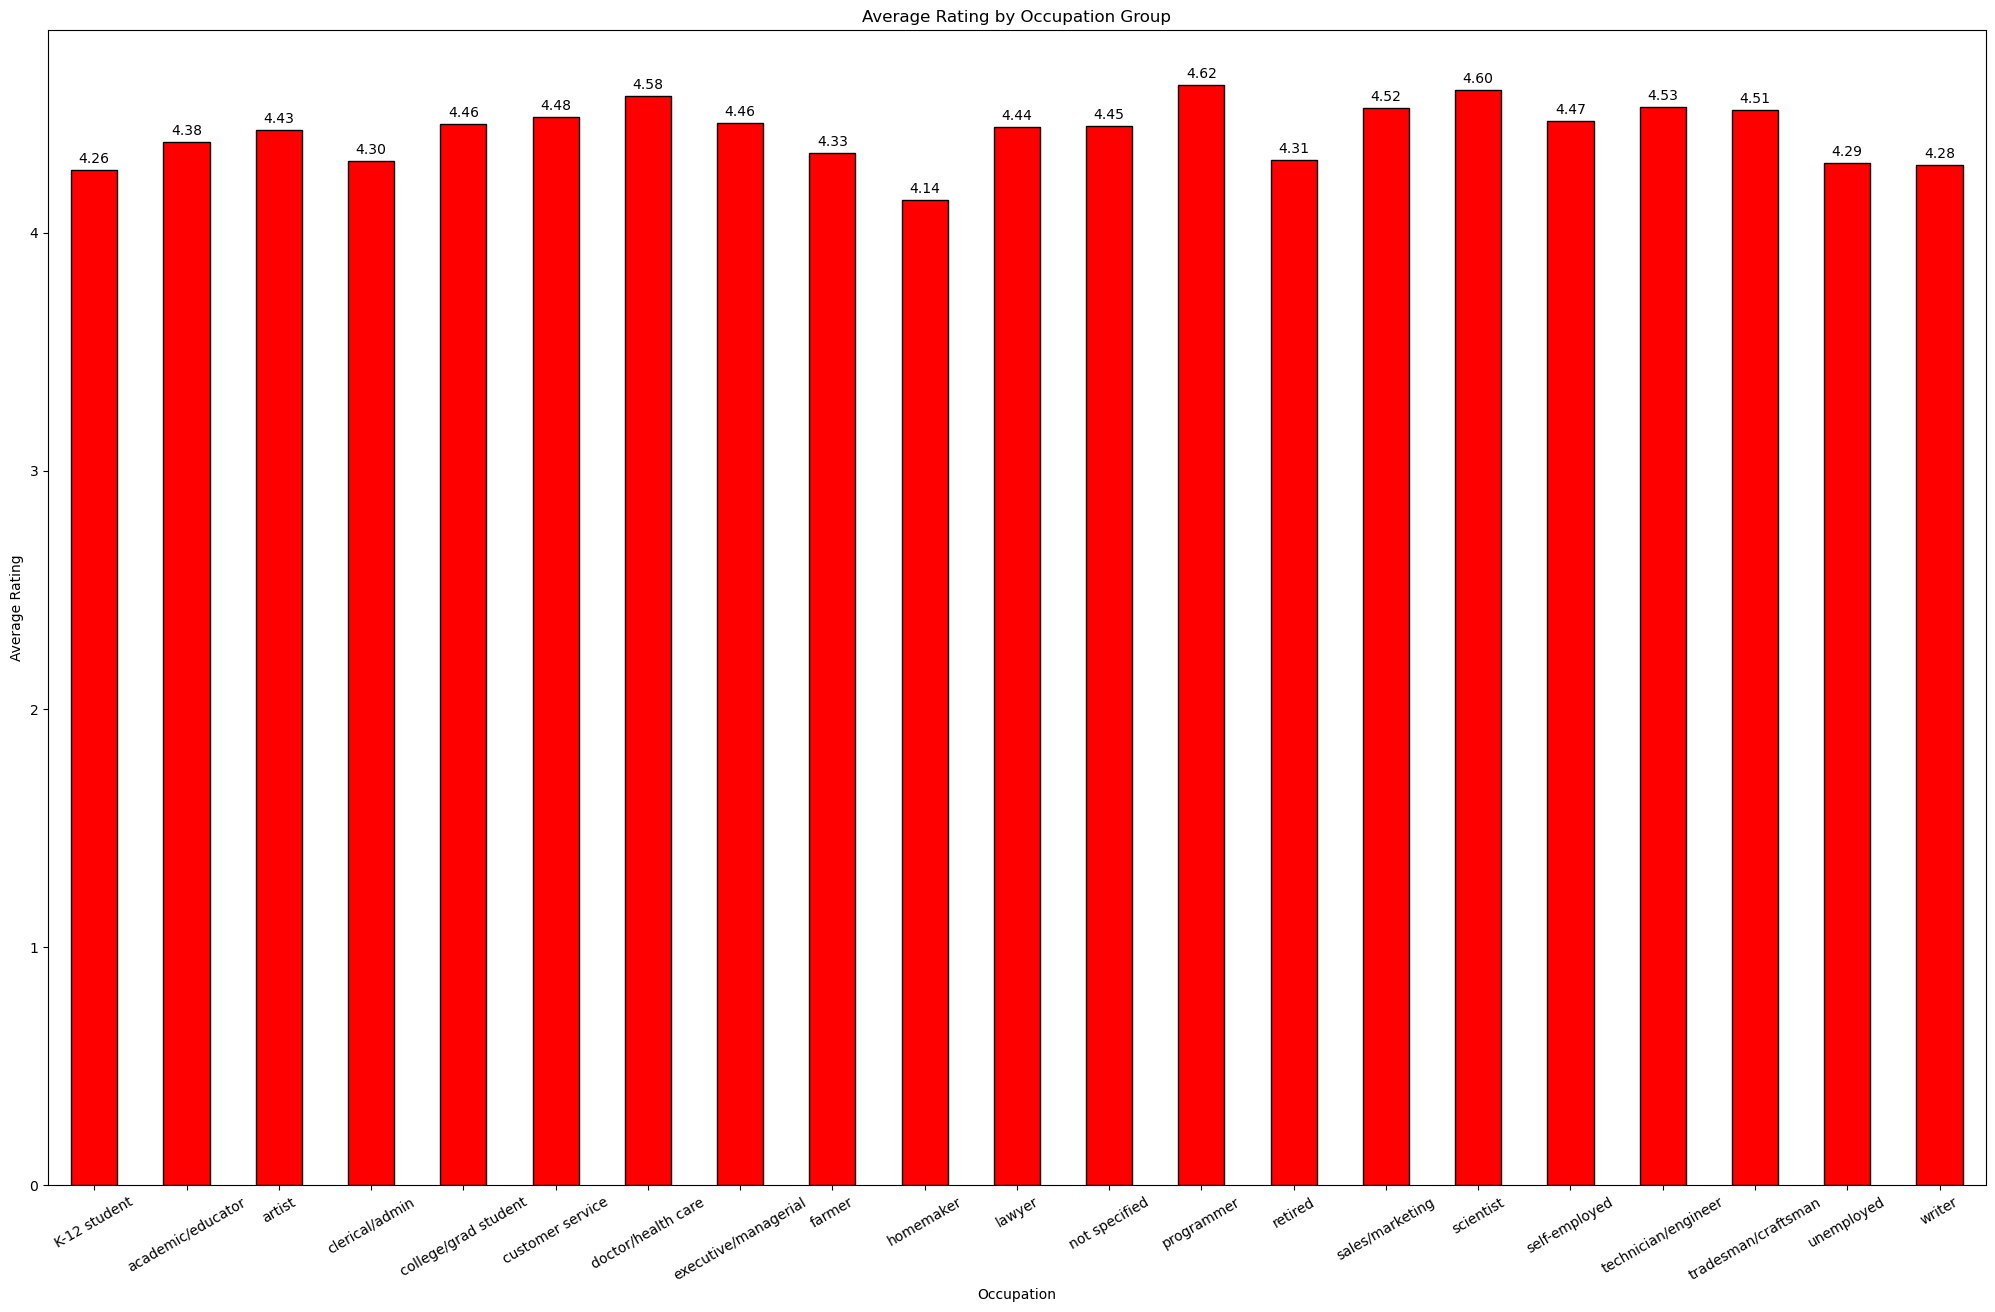

In [39]:
import matplotlib.pyplot as plt

starwars4 = data[data['title'] == 'Star Wars: Episode IV - A New Hope (1977)']
age_group = starwars4.groupby('occupation')['rating'].mean()
# plot size
fig, ax = plt.subplots(figsize=(25,15))
age_group.plot(
    kind='bar',
    color='red',
    edgecolor='black',
    linewidth=1
)

#value labels on the bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type='edge', color='black', fontsize=10, padding=3)

plt.title("Average Rating by Occupation Group")
plt.xlabel("Occupation")
plt.ylabel("Average Rating")
plt.xticks(rotation=30)
plt.show()

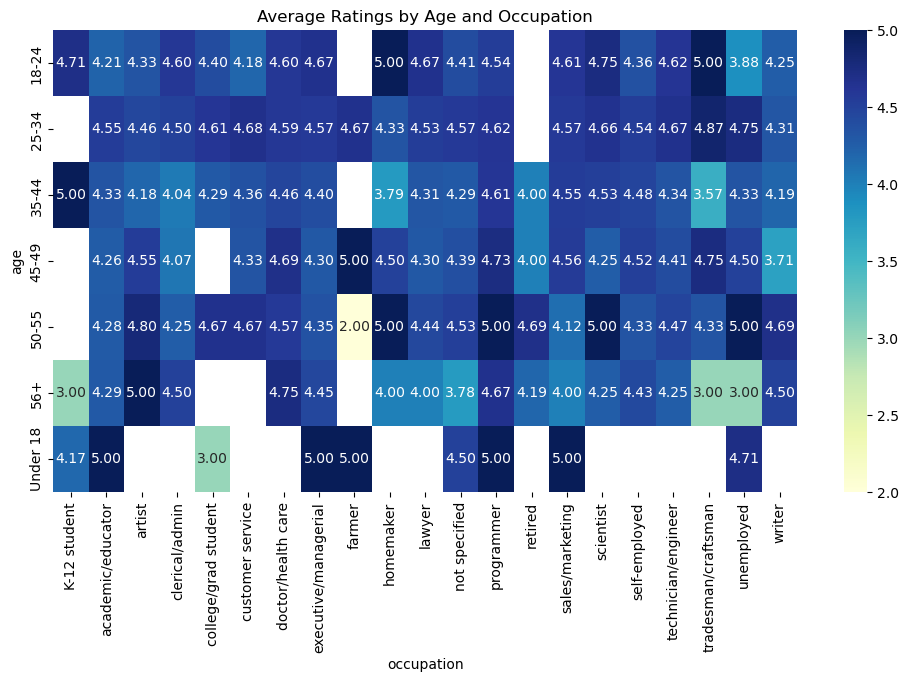

In [40]:
import seaborn as sns

pivot = starwars4.pivot_table(index="age", columns="occupation", values="rating", aggfunc="mean")

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Average Ratings by Age and Occupation")
plt.show()

Based on the plots, Star Wars IV is highly rated and widely watched. Programmers, engineers, doctors, and scientists gave the highest averages ≈ 4.5+. This means the fan base is mostly knowledge based and technical professions. 

Highest ratings by age group came from the 25–34 age group ≈4.57 and 50–55 ≈4.46.

Heatmap shows high ratings in most occupation and age group intersections, thus Star Wars: Episode IV – A New Hope (1977) is a critical and popular success.